<a href="https://colab.research.google.com/github/ekrell/intro-python-msgso/blob/main/Intro_Python_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Python | Part 2: Data Exploration

Brought to you by [iCORE](http://icore.tamucc.edu/) & [MSGSO](https://msgsoresearchforum.wixsite.com/msgsosymposium/about).

The purpose of this section is to introduce a few of the very commonly used Python libraries for scientific computing.

**Scientific Python libraries**

- `numpy` : for working with multi-dimensional array data
- `pandas` : for working with tabular data
- `matplotlib` : plotting tools
- `scipy` : various utilities for scientific computing

**Outline**

1. `numpy` basics
2. `pandas` basics
3. Example: exploring water & air tempurate dataset

## Numpy Basics

Material adapted from the [numpy quickstart](https://numpy.org/doc/stable/user/quickstart.html)

The `numpy` library include a specialized datatype for working with array data called the `ndarray`. It also includes a plethora of utilities for processing those arrays. `numpy` is designed to efficiently process array data. With proper use, it is possible to obtain orders of magnitude speedup over built-in Python numeric processing capabilities.

- Basic numpy object: multi-dimensional array
  - Arrays are stored in an _object_ called `ndarray`
  - Homogeneous: all elements have the same type
  - The dimensions are called axes
  - Has all manner of _attributes_ like `.ndim`, `.shape`, `.size`, etc
  - Caution: like lists, use `.copy()` to make a deep copy.

In [ ]:
import numpy as np

### Create an `ndarray`

In [ ]:
# First make a list
data = [
  [85.0, 45.2, 87.3, 24.5, 23.7],
  [74.5, 45.1, 35.8, 12.5, 72.9],
  [72.3, 11.2, 93.3, 68.3, 86.7]
]

print(data)

[[85.0, 45.2, 87.3, 24.5, 23.7], [74.5, 45.1, 35.8, 12.5, 72.9], [72.3, 11.2, 93.3, 68.3, 86.7]]


In [ ]:
# Convert to ndarray
data = np.array(data)

print(data)

[[85.  45.2 87.3 24.5 23.7]
 [74.5 45.1 35.8 12.5 72.9]
 [72.3 11.2 93.3 68.3 86.7]]


In [ ]:
# Array's shape
print(data.shape)

# Number of dimensions
print(data.ndim)

# Type of data elements
print(data.dtype.name)

# Size of each element (in bytes)
print(data.itemsize)

# Size (number of elements)
print(data.size)

# Type of 'data' variable
print(type(data))

(3, 5)
2
float64
8
15
<class 'numpy.ndarray'>


**Other ways to initialize arrays**

In [ ]:
# Init all values to 0
arr_zeros = np.zeros((3, 4))
print(arr_zeros)

print("\n----\n")

# Init all values to 1,  and delare the data type
arr_ones = np.ones((2, 3, 4), dtype=np.int16)
print(arr_ones)

print("\n----\n")

# Init as a sequence
arr_seq = np.arange(12).reshape(3, 4)
print(arr_seq)

print("\n----\n")

# Return evenly spaced numbers over a specified interval.
arr_lin = np.linspace(0, 2, 9)
print(arr_lin)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

----

[[[1 1 1 1]
  [1 1 1 1]
  [1 1 1 1]]

 [[1 1 1 1]
  [1 1 1 1]
  [1 1 1 1]]]

----

[[4.65901020e-310 0.00000000e+000 6.70908045e-310]
 [6.70908047e-310 6.70908047e-310 6.70909924e-310]]

----

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

----

[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]


### Basic Operations

Operations are typically _elementwise_.

**Operate with two arrays of equal length**

In [ ]:
# Example: two arrays of equal length
a = np.array([20, 30, 40, 50])
b = np.arange(4)

print("a", a)
print("b", b)

c = a - b
print("c", c)

d = a * b
print("d", d)

a [20 30 40 50]
b [0 1 2 3]
c [20 29 38 47]
d [  0  30  80 150]


**Apply operations to single array**

In [ ]:
# Exponentiation
print(b**2)

# Constants & functions
print(10 * np.sin(a))

# Boolean logic
print(a < 40)

[0 1 4 9]
[ 9.12945251 -9.88031624  7.4511316  -2.62374854]
[ True  True False False]


**What about the dot product?**

In [ ]:
A = np.array([[1, 1],
              [0, 1]])

B = np.array([[2, 0],
              [3, 4]])

# Elementwise product
print(A * B)

print("\n")

# Dot product
print(A.dot(B))


[[2 0]
 [0 4]]


[[5 4]
 [3 4]]


**Arrays with different types**

_Upcasting_: when the arrays have different types, convert to the more general

For example, makes sense to store an _int_ as a float without losing information, but not the other way around.

In [ ]:
a = np.ones(3, dtype=np.int32)
print("a", a.dtype.name, a)

b = np.linspace(0, np.pi, 3)
print("b", b.dtype.name, b)

a int32 [1 1 1]
b float64 [0.         1.57079633 3.14159265]


In [ ]:
# Upcasting
c = a + b
print("c", c.dtype.name, c)

d = np.exp(c * 1j)
print("d", d.dtype.name, d)

c float64 [1.         2.57079633 4.14159265]
d complex128 [ 0.54030231+0.84147098j -0.84147098+0.54030231j -0.54030231-0.84147098j]


**Common unary operations**

- Can be applied to entire array
- Or specified axes

Careful with the axes:
- The axes are ordered (rows, columns, ...).
- `axis=0` gives you the result for each column.
- Because it applied the operations _along_ the rows.

In [ ]:
rg = np.random.default_rng(1)  # Create instance of random number generator
a = rg.random((2, 3))
print("a", a)

# Entire array
a_sum, a_min, a_max, a_mean = a.sum(), a.min(), a.max(), a.mean()
print(f"sum: {a_sum:.4f}  min: {a_min:.4f}  max: {a_max:.4f}  mean: {a_mean:.4f}")

a [[0.51182162 0.9504637  0.14415961]
 [0.94864945 0.31183145 0.42332645]]
sum: 3.2903  min: 0.1442  max: 0.9505  mean: 0.5484


In [ ]:
# Specified axis
print("Sum of each column:", a.sum(axis=0))  # Sums along the rows

print("Sum of each row:", a.sum(axis=1))     # Sums along the columns

Sum of each column: [1.46047107 1.26229515 0.56748606]
Sum of each row: [1.60644493 1.68380735]


### Indexing & Slicing

**One-dimensional**

In [ ]:
a = np.arange(10)
print(a)

print(a[2:5])    # Start at 2, stop before 5

print(a[:6:2])   # Every other value, before 6

print(a[::-1])   # Reverse

[0 1 2 3 4 5 6 7 8 9]
[2 3 4]
[0 2 4]
[9 8 7 6 5 4 3 2 1 0]


**Two-dimensional**

In [ ]:
b = np.arange(30).reshape(3, 10)
print(b)
print("\n")

# Select first row
print(b[0])
print("\n")

# Select second column
print(b[:, 1])
print("\n")

# Select every other column
print(b[:, ::2])
print("\n")

# Select every other column, last row
print(b[-1, ::2])
print("\n")

# Select arbitrary rows, columns
rows = (1, 2)
cols = (2, 5, 6)
print(b[rows, :][:, cols])  # There are others ways, but this one is simple

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]


[0 1 2 3 4 5 6 7 8 9]


[ 1 11 21]


[[ 0  2  4  6  8]
 [10 12 14 16 18]
 [20 22 24 26 28]]


[20 22 24 26 28]


[[12 15 16]
 [22 25 26]]


**N-dimensional**

In [ ]:
dimensions = (5, 3, 6, 7, 100)

a = np.ones(dimensions)
print(a.shape)

# Subset on first and last axes
a_ = a[2:3, ..., ::2]
print(a_.shape)

(5, 3, 6, 7, 100)
(1, 3, 6, 7, 50)


**Iteration**

We can use them in loops, just like lists.

In [ ]:
# Loop over single axis
arr = np.arange(10)
for a in arr:
  print(a, end="  ")
print("\n")


arr = np.arange(10).reshape((2, 5))
for a in arr:
  print(a**2)

0  1  2  3  4  5  6  7  8  9  

[ 0  1  4  9 16]
[25 36 49 64 81]


In [ ]:
# Loop over multiple axes
arr = np.arange(10).reshape((2, 5))
for row in arr:
  for item in row:
    print(item, end=",")

0,1,2,3,4,5,6,7,8,9,

**Caution: loops are slow and can often be avoided**

- Under the hood, `numpy` processes arrays very efficiently
- Since it knows the structure of the `ndarray` and that all elements have the same data type --> can take advantages of hardware capabilities for [SIMD operations](http://ftp.cvut.cz/kernel/people/geoff/cell/ps3-linux-docs/CellProgrammingTutorial/BasicsOfSIMDProgramming.html)
- Converting "loop" processes to SIMD array operations is often called _vectorization_

In [ ]:
# Constants
a = 0.4
b = 22

# Loop
arr = np.arange(10).reshape((2, 5))
print(arr)
print()

# Empty array with shape of arr
res = np.ones(arr.shape)

for i, row in enumerate(arr):
  for j, item in enumerate(row):
      res[i, j] = ((1 - a) * item) + (a * b)
print(res)

print()

# Vectorized alternative
res = ((1 - a) * arr) + (a * b)
print(res)

[[0 1 2 3 4]
 [5 6 7 8 9]]

[[ 8.8  9.4 10.  10.6 11.2]
 [11.8 12.4 13.  13.6 14.2]]

[[ 8.8  9.4 10.  10.6 11.2]
 [11.8 12.4 13.  13.6 14.2]]


### Shape Manipulation

In [ ]:
a = np.floor(10 * rg.random((3, 4)))
print("original\n", a, "\n")

print("ravel", a.ravel(), "\n")

print("transpose\n", a.T, "\n")

print("reshape\n", a.reshape(4, 3))

original
 [[2. 2. 7. 2.]
 [4. 9. 9. 7.]
 [5. 2. 1. 9.]] 

ravel [2. 2. 7. 2. 4. 9. 9. 7. 5. 2. 1. 9.] 

transpose
 [[2. 4. 5.]
 [2. 9. 2.]
 [7. 9. 1.]
 [2. 7. 9.]] 

reshape
 [[2. 2. 7.]
 [2. 4. 9.]
 [9. 7. 5.]
 [2. 1. 9.]]


## Pandas Basics

`pandas` is a libray for working with tabular data.

Material adapted from the [pandas quickstart](https://pandas.pydata.org/docs/user_guide/10min.html)

Pandas provides two basic data structures:

- `Series`: one-dimensional, single-datatype.
- `DataFrame`: two-dimensional table with rows and columns.

Pandas is built on top of numpy, providing extra functionality for working with 1D and 2D data.

Here, we will focus on the pandas `DataFrame`.

In [ ]:
import numpy as np
import pandas as pd

### Make a DataFrame

In [ ]:
# From lists
names = ["Luna Moth", "Turbulent Phosphila Moth", "Maize Calligrapher", ""]
scinames = ["Actias luna", "Phosphila turbulenta", "Toxomerus politus", "Harrisina coracina"]
counties = ["Tyler", "Tyler", "Nueces", "Nueces"]
counts = [4, 100, 3, 30]

df = pd.DataFrame(
    {
        "common_name" : names,
        "scientific_name" : scinames,
        "county" : counties,
        "count" : counts
    }
)

df

,common_name,scientific_name,county,count
0,Luna Moth,Actias luna,Tyler,4
1,Turbulent Phosphila Moth,Phosphila turbulenta,Tyler,100
2,Maize Calligrapher,Toxomerus politus,Nueces,3
3,,Harrisina coracina,Nueces,30


In [ ]:
# Different columns can have different types
print(df.dtypes, "\n")

# Shape
print(df.shape, "\n")

# Column names
print(df.columns, "\n")

# Index
print(df.index, "\n")

# Summary
df.describe()

common_name        object
scientific_name    object
county             object
count               int64
dtype: object 

(4, 4) 

Index(['common_name', 'scientific_name', 'county', 'count'], dtype='object') 

RangeIndex(start=0, stop=4, step=1) 



,count
count,4.000000
mean,34.250000
std,45.580515
min,3.000000
25%,3.750000
50%,17.000000
75%,47.500000
max,100.000000


In [ ]:
# Convert to numpy
df.to_numpy()

# But don't they have to have the same dtype?
# They do: 'object'

array([['Luna Moth', 'Actias luna', 'Tyler', 4],
       ['Turbulent Phosphila Moth', 'Phosphila turbulenta', 'Tyler', 100],
       ['Maize Calligrapher', 'Toxomerus politus', 'Nueces', 3],
       ['', 'Harrisina coracina', 'Nueces', 30]], dtype=object)

**More processing examples**


In [ ]:
n_periods = 8
dates = pd.date_range("20130101", periods=n_periods)
df = pd.DataFrame(np.random.randn(n_periods, 4),
                  index=dates,
                  columns=["A", "B", "C", "D"])
df

,A,B,C,D
2013-01-01,0.835073,-1.791751,0.236370,1.098209
2013-01-02,-0.960432,0.186050,-0.001314,-0.083910
2013-01-03,-0.564610,0.542354,0.288132,1.894533
2013-01-04,0.165241,2.104597,-0.194124,-0.817616
2013-01-05,-2.602814,-0.472667,1.152051,-0.870416
2013-01-06,0.057449,1.073919,1.568338,0.698742
2013-01-07,-0.509852,-0.631136,1.008312,-0.474858
2013-01-08,0.649983,0.373423,0.306553,-1.337628


In [ ]:
# Different columns can have different types
print(df.dtypes, "\n")

# Shape
print(df.shape, "\n")

# Column names
print(df.columns, "\n")

# Index
print(df.index, "\n")

# Summary
df.describe()

A    float64
B    float64
C    float64
D    float64
dtype: object 

(8, 4) 

Index(['A', 'B', 'C', 'D'], dtype='object') 

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08'],
              dtype='datetime64[ns]', freq='D') 



,A,B,C,D
count,8.000000,8.000000,8.000000,8.000000
mean,-0.366245,0.173098,0.545540,0.013382
std,1.092386,1.173715,0.620281,1.116757
min,-2.602814,-1.791751,-0.194124,-1.337628
25%,-0.663566,-0.512285,0.176949,-0.830816
50%,-0.226201,0.279736,0.297342,-0.279384
75%,0.286427,0.675245,1.044247,0.798609
max,0.835073,2.104597,1.568338,1.894533


In [ ]:
# Transpose
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06,2013-01-07,2013-01-08
A,0.835073,-0.960432,-0.564610,0.165241,-2.602814,0.057449,-0.509852,0.649983
B,-1.791751,0.186050,0.542354,2.104597,-0.472667,1.073919,-0.631136,0.373423
C,0.236370,-0.001314,0.288132,-0.194124,1.152051,1.568338,1.008312,0.306553
D,1.098209,-0.083910,1.894533,-0.817616,-0.870416,0.698742,-0.474858,-1.337628


In [ ]:
# Sort: by index
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,1.098209,0.236370,-1.791751,0.835073
2013-01-02,-0.083910,-0.001314,0.186050,-0.960432
2013-01-03,1.894533,0.288132,0.542354,-0.564610
2013-01-04,-0.817616,-0.194124,2.104597,0.165241
2013-01-05,-0.870416,1.152051,-0.472667,-2.602814
2013-01-06,0.698742,1.568338,1.073919,0.057449
2013-01-07,-0.474858,1.008312,-0.631136,-0.509852
2013-01-08,-1.337628,0.306553,0.373423,0.649983


In [ ]:
# Sort: by values
df.sort_values(by="C")

,A,B,C,D
2013-01-04,0.165241,2.104597,-0.194124,-0.817616
2013-01-02,-0.960432,0.186050,-0.001314,-0.083910
2013-01-01,0.835073,-1.791751,0.236370,1.098209
2013-01-03,-0.564610,0.542354,0.288132,1.894533
2013-01-08,0.649983,0.373423,0.306553,-1.337628
2013-01-07,-0.509852,-0.631136,1.008312,-0.474858
2013-01-05,-2.602814,-0.472667,1.152051,-0.870416
2013-01-06,0.057449,1.073919,1.568338,0.698742


### Selection

**Get columns**

In [ ]:
df["A"]

2013-01-01    0.835073
2013-01-02   -0.960432
2013-01-03   -0.564610
2013-01-04    0.165241
2013-01-05   -2.602814
2013-01-06    0.057449
2013-01-07   -0.509852
2013-01-08    0.649983
Freq: D, Name: A, dtype: float64

In [ ]:
df[["A", "C"]]

,A,C
2013-01-01,0.835073,0.236370
2013-01-02,-0.960432,-0.001314
2013-01-03,-0.564610,0.288132
2013-01-04,0.165241,-0.194124
2013-01-05,-2.602814,1.152051
2013-01-06,0.057449,1.568338
2013-01-07,-0.509852,1.008312
2013-01-08,0.649983,0.306553


**Get rows**

In [ ]:
df[4:7]

,A,B,C,D
2013-01-05,-2.602814,-0.472667,1.152051,-0.870416
2013-01-06,0.057449,1.073919,1.568338,0.698742
2013-01-07,-0.509852,-0.631136,1.008312,-0.474858


In [ ]:
df[::2]

,A,B,C,D
2013-01-01,0.835073,-1.791751,0.236370,1.098209
2013-01-03,-0.564610,0.542354,0.288132,1.894533
2013-01-05,-2.602814,-0.472667,1.152051,-0.870416
2013-01-07,-0.509852,-0.631136,1.008312,-0.474858


**Selection by label**

- Using `.loc()`

In [ ]:
# Select a row matching a label
df.loc[dates[2]]

A   -0.564610
B    0.542354
C    0.288132
D    1.894533
Name: 2013-01-03 00:00:00, dtype: float64

In [ ]:
# Slice on rows and columns
df.loc["20130102":"20130104", ["B", "D"]]

,B,D
2013-01-02,0.186050,-0.083910
2013-01-03,0.542354,1.894533
2013-01-04,2.104597,-0.817616


**Selection by position**

- Using `.iloc()`
- Very much like numpy

In [ ]:
df.iloc[3]

A    0.165241
B    2.104597
C   -0.194124
D   -0.817616
Name: 2013-01-04 00:00:00, dtype: float64

In [ ]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,0.165241,2.104597
2013-01-05,-2.602814,-0.472667


In [ ]:
# Use a list of integers as selection indices
df.iloc[[1, 2, 4],    # rows
         [0, 2]]      # columns

,A,C
2013-01-02,-0.960432,-0.001314
2013-01-03,-0.564610,0.288132
2013-01-05,-2.602814,1.152051


**Logical indexing**

- Use boolean logic to select data based on conditions

In [ ]:
df[df["A"] > 0]

,A,B,C,D
2013-01-01,0.835073,-1.791751,0.236370,1.098209
2013-01-04,0.165241,2.104597,-0.194124,-0.817616
2013-01-06,0.057449,1.073919,1.568338,0.698742
2013-01-08,0.649983,0.373423,0.306553,-1.337628


In [ ]:
# Multiple conditions (chain them)
df[df["B"] > 0][df["C"] > 0]

<ipython-input-40-b41ad4183398>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df["B"] > 0][df["C"] > 0]


,A,B,C,D
2013-01-03,-0.564610,0.542354,0.288132,1.894533
2013-01-06,0.057449,1.073919,1.568338,0.698742
2013-01-08,0.649983,0.373423,0.306553,-1.337628


### Setting

**Add a new column**

In [ ]:
df["F"] = np.sin(np.array(range(len(df))))
df

,A,B,C,D,F
2013-01-01,0.835073,-1.791751,0.236370,1.098209,0.000000
2013-01-02,-0.960432,0.186050,-0.001314,-0.083910,0.841471
2013-01-03,-0.564610,0.542354,0.288132,1.894533,0.909297
2013-01-04,0.165241,2.104597,-0.194124,-0.817616,0.141120
2013-01-05,-2.602814,-0.472667,1.152051,-0.870416,-0.756802
2013-01-06,0.057449,1.073919,1.568338,0.698742,-0.958924
2013-01-07,-0.509852,-0.631136,1.008312,-0.474858,-0.279415
2013-01-08,0.649983,0.373423,0.306553,-1.337628,0.656987


**Replace existing values**

- Combines _selection_ with assignment

In [ ]:
# Replace a single value
df.loc[dates[0], "A"] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,-1.791751,0.236370,1.098209,0.000000
2013-01-02,-0.960432,0.186050,-0.001314,-0.083910,0.841471
2013-01-03,-0.564610,0.542354,0.288132,1.894533,0.909297
2013-01-04,0.165241,2.104597,-0.194124,-0.817616,0.141120
2013-01-05,-2.602814,-0.472667,1.152051,-0.870416,-0.756802
2013-01-06,0.057449,1.073919,1.568338,0.698742,-0.958924
2013-01-07,-0.509852,-0.631136,1.008312,-0.474858,-0.279415
2013-01-08,0.649983,0.373423,0.306553,-1.337628,0.656987


In [ ]:
# Replace multiple values with a constant
df.iloc[2:6, 3] = 43.4
df

,A,B,C,D,F
2013-01-01,0.000000,-1.791751,0.236370,1.098209,0.000000
2013-01-02,-0.960432,0.186050,-0.001314,-0.083910,0.841471
2013-01-03,-0.564610,0.542354,0.288132,43.400000,0.909297
2013-01-04,0.165241,2.104597,-0.194124,43.400000,0.141120
2013-01-05,-2.602814,-0.472667,1.152051,43.400000,-0.756802
2013-01-06,0.057449,1.073919,1.568338,43.400000,-0.958924
2013-01-07,-0.509852,-0.631136,1.008312,-0.474858,-0.279415
2013-01-08,0.649983,0.373423,0.306553,-1.337628,0.656987


In [ ]:
# Replace multiple values with a constant

#df.iloc[2:6, 2:4] = [[10, 20, 30, 40], [50, 60, 70, 80]]  # <-- why not this?

df.iloc[2:6, 2:4] = [[10, 20], [30, 40], [50, 60], [70, 80]]
df

,A,B,C,D,F
2013-01-01,0.000000,-1.791751,0.236370,1.098209,0.000000
2013-01-02,-0.960432,0.186050,-0.001314,-0.083910,0.841471
2013-01-03,-0.564610,0.542354,10.000000,20.000000,0.909297
2013-01-04,0.165241,2.104597,30.000000,40.000000,0.141120
2013-01-05,-2.602814,-0.472667,50.000000,60.000000,-0.756802
2013-01-06,0.057449,1.073919,70.000000,80.000000,-0.958924
2013-01-07,-0.509852,-0.631136,1.008312,-0.474858,-0.279415
2013-01-08,0.649983,0.373423,0.306553,-1.337628,0.656987


In [ ]:
# With a condition
df[df < 0] = 0.0
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.236370,1.098209,0.000000
2013-01-02,0.000000,0.186050,0.000000,0.000000,0.841471
2013-01-03,0.000000,0.542354,10.000000,20.000000,0.909297
2013-01-04,0.165241,2.104597,30.000000,40.000000,0.141120
2013-01-05,0.000000,0.000000,50.000000,60.000000,0.000000
2013-01-06,0.057449,1.073919,70.000000,80.000000,0.000000
2013-01-07,0.000000,0.000000,1.008312,0.000000,0.000000
2013-01-08,0.649983,0.373423,0.306553,0.000000,0.656987


### Missing data

- Numpy has a special type to indicate missing data: `np.nan`
- In pandas, these values will not be used for computations.
- Always a good idea to check for `np.nan` values early in the analysis.

In [ ]:
df[df <= 0] = np.nan
df

,A,B,C,D,F
2013-01-01,NaN,NaN,0.236370,1.098209,NaN
2013-01-02,NaN,0.186050,NaN,NaN,0.841471
2013-01-03,NaN,0.542354,10.000000,20.000000,0.909297
2013-01-04,0.165241,2.104597,30.000000,40.000000,0.141120
2013-01-05,NaN,NaN,50.000000,60.000000,NaN
2013-01-06,0.057449,1.073919,70.000000,80.000000,NaN
2013-01-07,NaN,NaN,1.008312,NaN,NaN
2013-01-08,0.649983,0.373423,0.306553,NaN,0.656987


In [ ]:
# Check for missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8 entries, 2013-01-01 to 2013-01-08
Freq: D
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       3 non-null      float64
 1   B       5 non-null      float64
 2   C       7 non-null      float64
 3   D       5 non-null      float64
 4   F       4 non-null      float64
dtypes: float64(5)
memory usage: 684.0 bytes


In [ ]:
# Drop missing data
df_drop = df.copy()   # Deep copy
df_drop.dropna(how="any")
df_drop

,A,B,C,D,F
2013-01-01,NaN,NaN,0.236370,1.098209,NaN
2013-01-02,NaN,0.186050,NaN,NaN,0.841471
2013-01-03,NaN,0.542354,10.000000,20.000000,0.909297
2013-01-04,0.165241,2.104597,30.000000,40.000000,0.141120
2013-01-05,NaN,NaN,50.000000,60.000000,NaN
2013-01-06,0.057449,1.073919,70.000000,80.000000,NaN
2013-01-07,NaN,NaN,1.008312,NaN,NaN
2013-01-08,0.649983,0.373423,0.306553,NaN,0.656987


In [ ]:
# Fill missing data
df.fillna(value=-999)

,A,B,C,D,F
2013-01-01,-999.000000,-999.000000,0.236370,1.098209,-999.000000
2013-01-02,-999.000000,0.186050,-999.000000,-999.000000,0.841471
2013-01-03,-999.000000,0.542354,10.000000,20.000000,0.909297
2013-01-04,0.165241,2.104597,30.000000,40.000000,0.141120
2013-01-05,-999.000000,-999.000000,50.000000,60.000000,-999.000000
2013-01-06,0.057449,1.073919,70.000000,80.000000,-999.000000
2013-01-07,-999.000000,-999.000000,1.008312,-999.000000,-999.000000
2013-01-08,0.649983,0.373423,0.306553,-999.000000,0.656987


### Operations

Many basic functions are built-in, such as the mean.


In [ ]:
# Column means
print(df.mean())

print("")

# Row means
print(df.mean(axis=1))

A     0.290891
B     0.856068
C    23.078748
D    40.219642
F     0.637219
dtype: float64

2013-01-01     0.667290
2013-01-02     0.513760
2013-01-03     7.862913
2013-01-04    14.482192
2013-01-05    55.000000
2013-01-06    37.782842
2013-01-07     1.008312
2013-01-08     0.496736
Freq: D, dtype: float64


### Merge & Join

**Concatenation**

Stacking rows on top of each other.

In [ ]:
df_a = pd.DataFrame(np.random.randn(4, 4))

df_b = pd.DataFrame(np.random.randn(6, 4))

df_c = pd.DataFrame(np.random.randn(5, 4))

print(len(df_a), len(df_b), len(df_c))

df_all = pd.concat([df_a, df_b, df_c])
print(len(df_all))

4 6 5
15


**Join**

- Suppose we have two DataFrames and we want to combine them
- But the order of the rows might not be consistent
- We use a _join_ operation to combine based on a shared column called a _key_

In [ ]:
df_left = pd.DataFrame(
    {
        "scientific_name" : ["Paralichthys lethostigma", "Cynoscion nebulosus", "Opsanus tau", "Trichiurus lepturus"],
        "taxon_year" : [1884, 1830, 1766, 1992],
        "taxon_id" : [141886, 13029, 8068, 487156]
    }
)


df_right = pd.DataFrame(
    {
        "name" : ["oyster toadfish", "southern flounder", "speckled trout", "Atlantic cutlassfish"],
        "taxon_id" : [8068, 141886, 13029, 487156]
    }
)

print(df_left)
print()
print(df_right)

            scientific_name  taxon_year  taxon_id
0  Paralichthys lethostigma        1884    141886
1       Cynoscion nebulosus        1830     13029
2               Opsanus tau        1766      8068
3       Trichiurus lepturus        1992    487156

                   name  taxon_id
0       oyster toadfish      8068
1     southern flounder    141886
2        speckled trout     13029
3  Atlantic cutlassfish    487156


In [ ]:
df_fish = pd.merge(df_left, df_right, on="taxon_id")
df_fish

,scientific_name,taxon_year,taxon_id,name
0,Paralichthys lethostigma,1884,141886,southern flounder
1,Cynoscion nebulosus,1830,13029,speckled trout
2,Opsanus tau,1766,8068,oyster toadfish
3,Trichiurus lepturus,1992,487156,Atlantic cutlassfish


### Import and Export

- `pandas` DataFrames can be saved to a file, typically a comma-separated file (`.csv`)
- They can also be loaded from a file.

**Save to `.csv`**

In [ ]:
# Save a DataFrame
filename = "fishes.csv"
df_fish.to_csv(filename)

# Use shell commands to inspect the file
!ls
!file fishes.csv
!cat fishes.csv

fishes.csv  sample_data
fishes.csv: CSV text
,scientific_name,taxon_year,taxon_id,name
0,Paralichthys lethostigma,1884,141886,southern flounder
1,Cynoscion nebulosus,1830,13029,speckled trout
2,Opsanus tau,1766,8068,oyster toadfish
3,Trichiurus lepturus,1992,487156,Atlantic cutlassfish


In [ ]:
# It can be nice to get rid of that numeric index
df_fish.to_csv(filename, index=False)

# Use shell commands to inspect the file
!ls
!file fishes.csv
!cat fishes.csv

fishes.csv  sample_data
fishes.csv: CSV text
scientific_name,taxon_year,taxon_id,name
Paralichthys lethostigma,1884,141886,southern flounder
Cynoscion nebulosus,1830,13029,speckled trout
Opsanus tau,1766,8068,oyster toadfish
Trichiurus lepturus,1992,487156,Atlantic cutlassfish


**Load from `.csv`**

In [ ]:
# Just load up a file (local or remote)
url = "https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv"
df = pd.read_csv(url)
df

,Country,Region
0,Algeria,AFRICA
1,Angola,AFRICA
2,Benin,AFRICA
3,Botswana,AFRICA
4,Burkina,AFRICA
...,...,...
189,Paraguay,SOUTH AMERICA
190,Peru,SOUTH AMERICA
191,Suriname,SOUTH AMERICA
192,Uruguay,SOUTH AMERICA


## Data Exploration: Water & Air Temperature



### Dataset

**Laguna Madre Wind & Air Temperature**

- ATP: air temperature (celsius)
  - Source: Packery
- WTP: water temperature (celsius)
  - Source: NPS-SBI

- Years: 2012-2020, 2022
- Resolution: hourly

https://www.sciencedirect.com/science/article/pii/S2352340923008909

### Setup

**Import modules**

In [ ]:
# We have seen these
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

# Other data science modules
import statsmodels as sm
from statsmodels.graphics import tsaplots
from statsmodels.tsa.seasonal import seasonal_decompose
import scipy.stats
from scipy.stats import spearmanr

# Smaller utility modules
import urllib.request       # For handling remote data

**Download remote data**

- The data is stored as multiple `.csv` files: one per year
- The format of filenames is: `atp_and_wtp_YEAR.csv` where `YEAR` is replaced by each year
- So we will download them all in a loop

In [ ]:
remote_directory = "https://raw.githubusercontent.com/conrad-blucher-institute/LagunaMadreWaterAirTempDataCleaner/main/imputed_data"
years = np.array(range(2012, 2023))

for year in years:
  filename = "atp_and_wtp_" + str(year) + ".csv"
  full_path = remote_directory + "/" + filename
  print(f"Downloading file: {full_path}")

  urllib.request.urlretrieve(full_path, filename)

# Check
!ls

atp_and_wtp_2012.csv  atp_and_wtp_2015.csv  atp_and_wtp_2018.csv  atp_and_wtp_2021.csv	sample_data
atp_and_wtp_2013.csv  atp_and_wtp_2016.csv  atp_and_wtp_2019.csv  atp_and_wtp_2022.csv
atp_and_wtp_2014.csv  atp_and_wtp_2017.csv  atp_and_wtp_2020.csv  fishes.csv


In [ ]:
# Open each file and concatenate into single DataFrame

dataframes = []
for year in years:
  filename = "atp_and_wtp_" + str(year) + ".csv"
  dataframes.append(pd.read_csv(filename))
  print(f"Loaded file: {filename}")

df = pd.concat(dataframes)
df

Loaded file: atp_and_wtp_2012.csv
Loaded file: atp_and_wtp_2013.csv
Loaded file: atp_and_wtp_2014.csv
Loaded file: atp_and_wtp_2015.csv
Loaded file: atp_and_wtp_2016.csv
Loaded file: atp_and_wtp_2017.csv
Loaded file: atp_and_wtp_2018.csv
Loaded file: atp_and_wtp_2019.csv
Loaded file: atp_and_wtp_2020.csv
Loaded file: atp_and_wtp_2021.csv
Loaded file: atp_and_wtp_2022.csv


,dateAndTime,packeryATP_lighthouse,npsbiWTP_lighthouse
0,01-01-2012 0000,18.8,17.7
1,01-01-2012 0100,18.9,17.6
2,01-01-2012 0200,18.7,17.5
3,01-01-2012 0300,19.7,17.4
4,01-01-2012 0400,18.7,17.4
...,...,...,...
8755,12-31-2022 1900,19.8,16.5
8756,12-31-2022 2000,22.3,16.8
8757,12-31-2022 2100,21.4,17.4
8758,12-31-2022 2200,21.8,17.6


In [ ]:
# Rename columns
df.rename(columns={'dateAndTime'           : 'datetime',
                   'packeryATP_lighthouse' : 'atp',
                   'npsbiWTP_lighthouse'   : 'wtp'}, inplace=True)
df.head()

,datetime,atp,wtp
0,01-01-2012 0000,18.8,17.7
1,01-01-2012 0100,18.9,17.6
2,01-01-2012 0200,18.7,17.5
3,01-01-2012 0300,19.7,17.4
4,01-01-2012 0400,18.7,17.4


**Enable a `datetime` index**

- Right now, there is a column named _datetime_
- These are just strings
- But we can convert them to the `datetime` object
- Then, `pandas` knows that they are times, and knows how to deal with them
- Then, we have **time series** data, with lots of functionality available

In [ ]:
# Convert the "datatime" column from Strings to a "datetime" index
df['datetime'] = pd.to_datetime(df["datetime"])

# Set as the index
df = df.set_index('datetime')
df

,atp,wtp
datetime,,
2012-01-01 00:00:00,18.8,17.7
2012-01-01 01:00:00,18.9,17.6
2012-01-01 02:00:00,18.7,17.5
2012-01-01 03:00:00,19.7,17.4
2012-01-01 04:00:00,18.7,17.4
...,...,...
2022-12-31 19:00:00,19.8,16.5
2022-12-31 20:00:00,22.3,16.8
2022-12-31 21:00:00,21.4,17.4


In [ ]:
df.describe()

,atp,wtp
count,94936.000000,96022.000000
mean,22.634717,23.681663
std,6.280913,6.311580
min,-6.600000,1.300000
25%,18.900000,19.000000
50%,24.000000,25.000000
75%,27.900000,29.100000
max,34.900000,34.600000


### Exploring data through visualization

**Simply plot all the points**

Text(0.5, 1.0, 'Water temp')

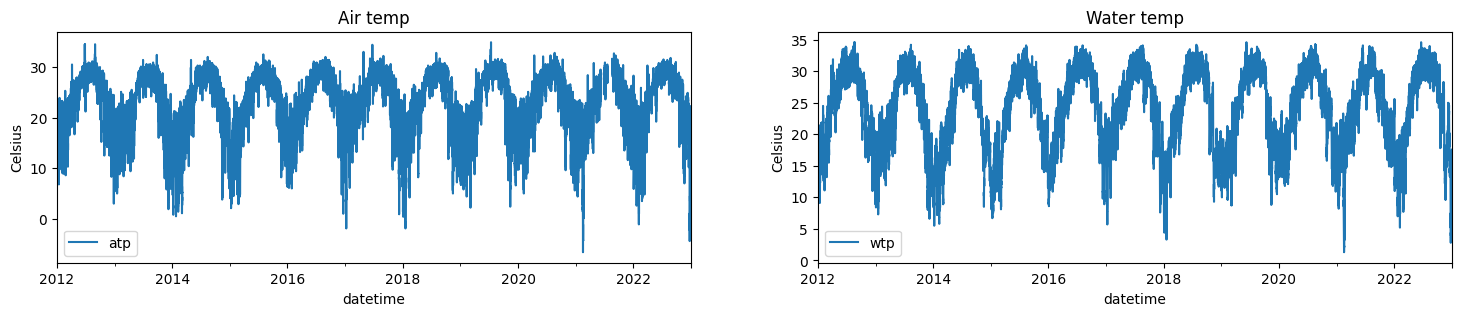

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(18,3))

df.plot(y='atp', ax=axs[0])
df.plot(y="wtp", ax=axs[1])

axs[0].set_ylabel("Celsius")
axs[1].set_ylabel("Celsius")

axs[0].set_title("Air temp")
axs[1].set_title("Water temp")

**Histograms**

<Axes: title={'center': 'wtp'}, ylabel='Frequency'>

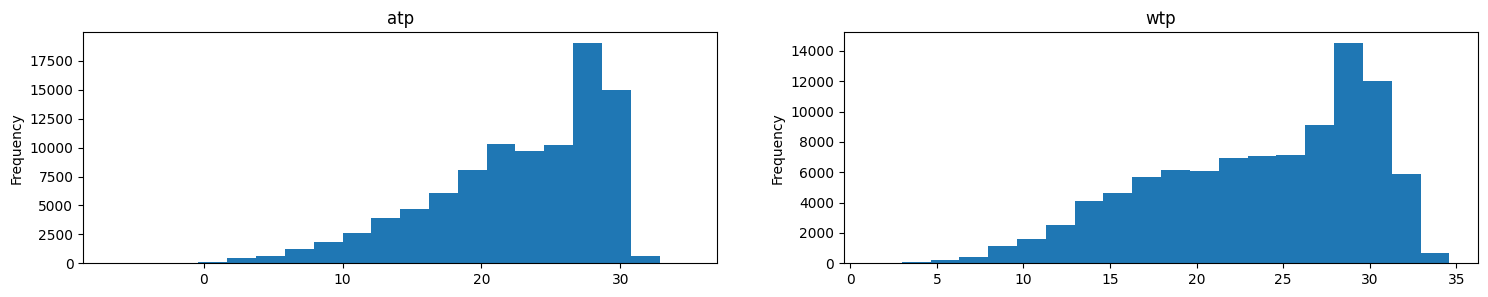

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(18, 3))
df['atp'].plot(kind='hist', bins=20, title='atp', ax=axs[0])
df['wtp'].plot(kind='hist', bins=20, title='wtp', ax=axs[1])

**Plot monthly mean, min, and max**

Text(0.5, 1.0, 'Water temp: monthly stats')

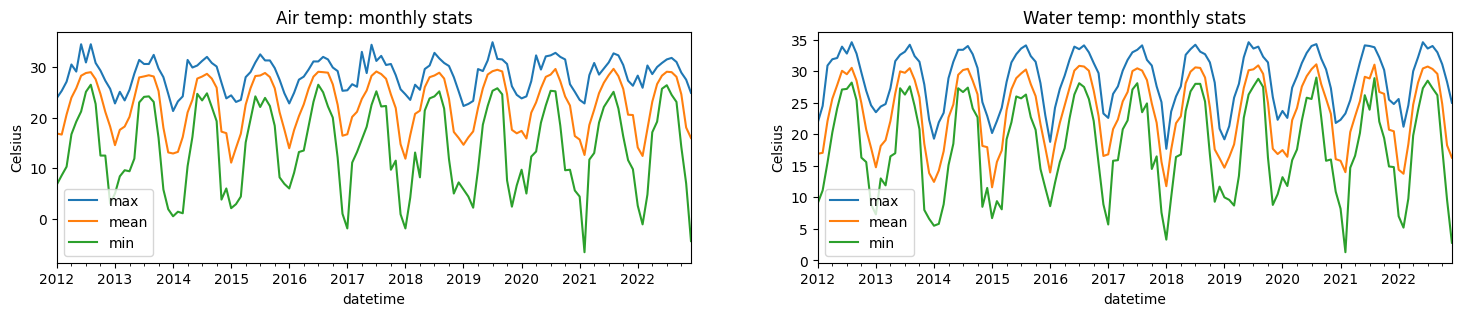

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(18,3))

df.resample("M").max().plot(y="atp", ax=axs[0], label="max")
df.resample("M").max().plot(y="wtp", ax=axs[1], label="max")

df.resample("M").mean().plot(y="atp", ax=axs[0], label="mean")
df.resample("M").mean().plot(y="wtp", ax=axs[1], label="mean")

df.resample("M").min().plot(y="atp", ax=axs[0], label="min")
df.resample("M").min().plot(y="wtp", ax=axs[1], label="min")

axs[0].set_ylabel("Celsius")
axs[1].set_ylabel("Celsius")

axs[0].set_title("Air temp: monthly stats")
axs[1].set_title("Water temp: monthly stats")

**Monthly summaries**

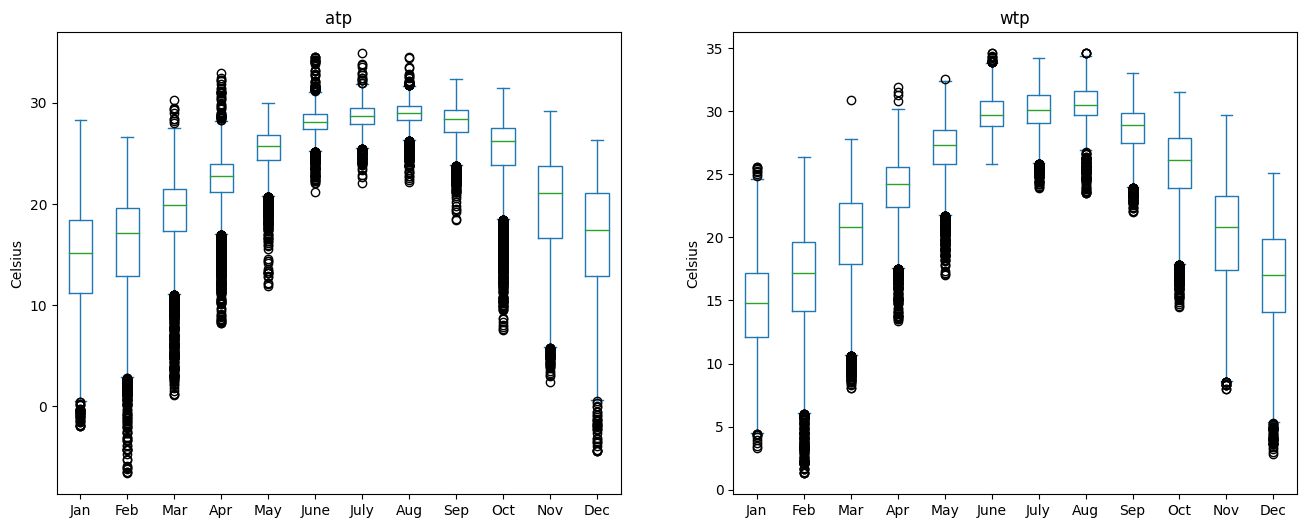

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16,6))

df.set_index(df.index.month, append=True)['atp'].unstack().plot.box(ax=axs[0])
df.set_index(df.index.month, append=True)['wtp'].unstack().plot.box(ax=axs[1])

axs[0].set_ylabel("Celsius")
axs[1].set_ylabel("Celsius")

axs[0].set_title("atp")
axs[1].set_title("wtp")

months = ["Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sep", "Oct", "Nov", "Dec"]
axs[0].set_xticklabels(months);
axs[1].set_xticklabels(months);

**Yearly summaries**

Text(0.5, 1.0, 'wtp')

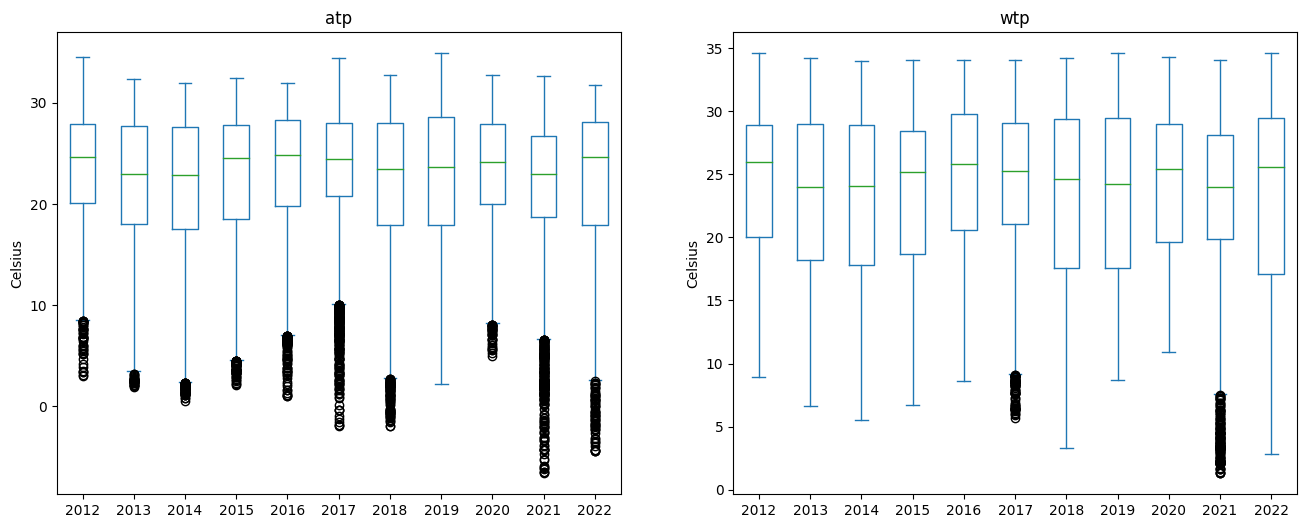

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16,6))

df.set_index(df.index.year, append=True)['atp'].unstack().plot.box(ax=axs[0])
df.set_index(df.index.year, append=True)['wtp'].unstack().plot.box(ax=axs[1])

axs[0].set_ylabel("Celsius")
axs[1].set_ylabel("Celsius")

axs[0].set_title("atp")
axs[1].set_title("wtp")

**Missing values**

In [ ]:
n_samples = len(df)

dfCounts = pd.DataFrame({
    "samples" : df.count(),
    "missing" : df.isna().sum(),
    "missing_prop" : df.isna().sum() / df.count(),
    "total" : df.isna().sum() + df.count()
})

dfCounts

,samples,missing,missing_prop,total
atp,94936,1496,0.015758,96432
wtp,96022,410,0.004270,96432


[]

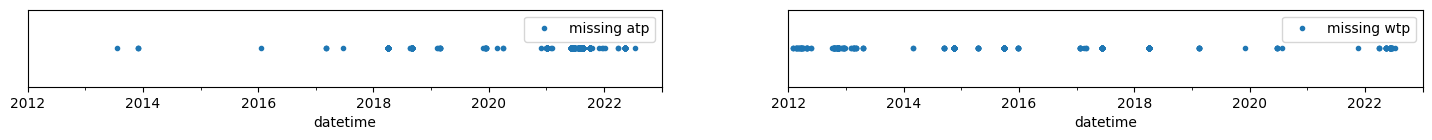

In [ ]:
# When do missing values occur?
dfnan = df.copy()
dfnan["atp"] = np.isnan(df["atp"].values).astype(int)
dfnan["wtp"] = np.isnan(df["wtp"].values).astype(int)

fig, axs = plt.subplots(1, 2, figsize=(18, 1))
dfnan.plot(y="atp", style=".", ax=axs[0], label="missing atp")
dfnan.plot(y="wtp", style=".", ax=axs[1], label="missing wtp")
axs[0].set_ylim(.9, 1.1)
axs[1].set_ylim(.9, 1.1)
axs[0].set_yticks([])
axs[1].set_yticks([])

### Correlation analysis

Text(0.5, 1.0, '')

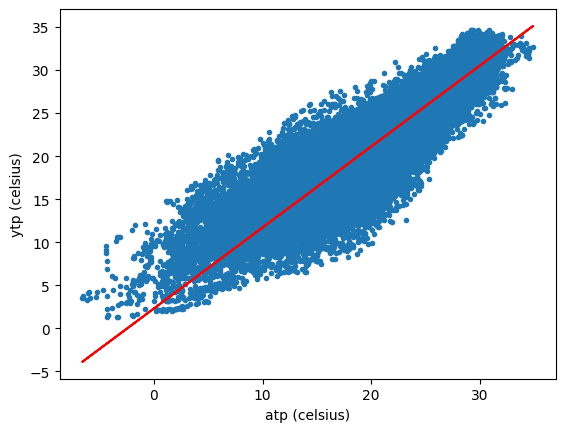

In [ ]:
# Drop missing values
dfc = df.dropna(axis = 0, how = 'any')

x = dfc["atp"]
y = dfc["wtp"]

# Scatter the points
plt.scatter(x, y, marker=".")
plt.xlabel("atp (celsius)")
plt.ylabel("ytp (celsius)")
# fitting a linear regression line
m, b = np.polyfit(x, y, 1)
# adding the regression line to the scatter plot
plt.plot(x, m*x + b, color="red")

plt.title("")

In [ ]:
# Quantitative summary
dfCorr = pd.DataFrame({
    "spearman" : [x.corr(y, method='spearman')],
    "pearson"  : [x.corr(y, method='pearson')],
    "kendall"  : [x.corr(y, method='kendall')],
})
dfCorr

,spearman,pearson,kendall
0,0.945311,0.935725,0.796


## Missing Value Imputation

- The next plots require unbroken time series
- We will simply replace with the mean for this example
- But appropriate handling of missing values is extremely important
- If your results are sensitive to the choice made, may get wrong conclusions
- Requires **domain expertise** for a proper procedure
- But, I want you to know **how** to do it, when you decide to do it

In [ ]:
# Impute missing values with mean
df = df.fillna(df.mean())
df

,atp,wtp
datetime,,
2012-01-01 00:00:00,18.8,17.7
2012-01-01 01:00:00,18.9,17.6
2012-01-01 02:00:00,18.7,17.5
2012-01-01 03:00:00,19.7,17.4
2012-01-01 04:00:00,18.7,17.4
...,...,...
2022-12-31 19:00:00,19.8,16.5
2022-12-31 20:00:00,22.3,16.8
2022-12-31 21:00:00,21.4,17.4


**Autocorrelation**

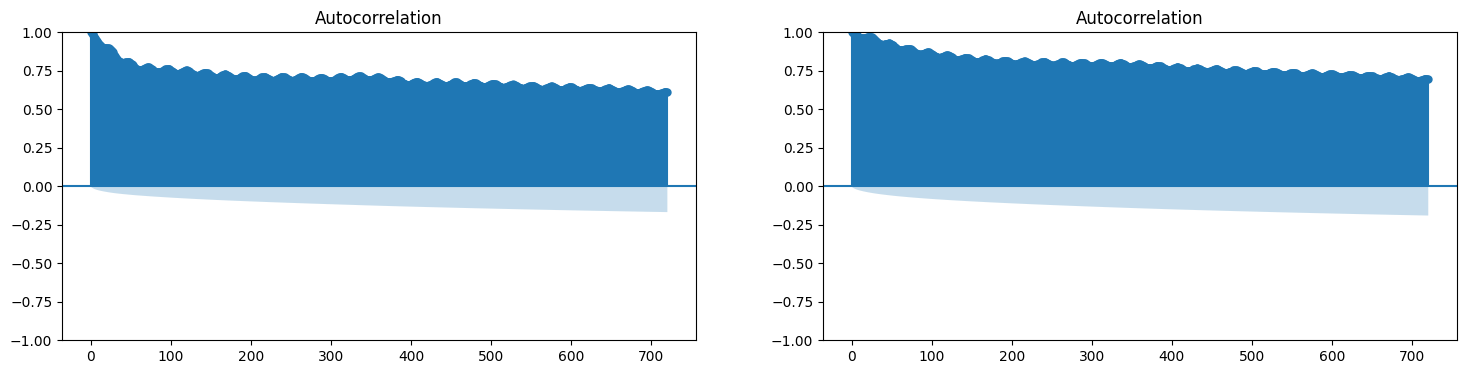

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(18, 4))

fig = tsaplots.plot_acf(dfc['atp'], lags= 720, ax=axs[0])
fig = tsaplots.plot_acf(dfc['wtp'], lags= 720, ax=axs[1])

# Intro to Python | Part 3: Machine Learning

The purpose of this section is to introduce the machine learning (ML) pipeline. The purpose is not to explain how ML works or how to choose the best ML modeling algorithm. Instead, the purpose is to show a complete example of how to load and process data, train simple models, and evaluate the results.

Computer scientistics and AI researchers devote substantial effort to developing ML modeling techniques. For the user, it is very important to understand how to appropriately us ML. It is easy to make mistakes and get a wrong or misleading analysis.

**Machine Learning**

- Supervised Machine Learning:
  - Inputs: predictors
  - Targets: ground truth predictands
  - Outputs: model's predictions

**Random Forest (RF)**

- A simple ML algorithm based on the [Decision Tree](https://scikit-learn.org/stable/modules/tree.html)
- Decision Tree: learn a flowchart from input to output with a sequence of decisions based on the data
- But a single Decision Tree typically not powerful enough for complex tasks
- Random Forest: an ensemble of Decision Trees that have their own understanding of the data
- [Learn more](https://en.wikipedia.org/wiki/Random_forest)

## Options

In [ ]:
selected_years = np.array(range(2012, 2023))
lead_time_hours = 12
prev_pred_hours = 6

### Partition Dataset: Train, Validation, and Test

**Training**

- Data samples are used to train supervised ML models.
- These data samples have inputs and targets.
- The goal is to learn the relationship between inputs and targets so that the model can skillful predictions / classications when it sees new inputs.
- The dataset used to train the model is called **training**.

**Testing**

- Just because the model does will with the training dataset, does not mean that it does well for other data.
- We want the model to be _generalizable_ beyond the samples that it used to train with.
- So we hold out a separate **testing** dataset that the model did not use to train with.
- We analyze the test set to see if the model is skillful outside the test set.

**Validation**

- If performance with the test set is not good enough, we might decide to fiddle with the model parameters and train new models.
- If we do this a bunch... then the test dataset is actually influencing the model.
- So even though we don't use training data for actually training the model, it is inderectly influencing it by our choices in model design.
- For this reason, we often have a third set called **validation** data.
- Validation data is not used for training the model, but we can check it frequently to see how our model is doing and make adjustments.

**Cross-validation**

- Another concern: what is we just got lucky with our choice of validation data?
- Example: we hold out 2020 for validation, but this year did not have extreme cold. So, the model might look better than it actuall is.
- Cross validation: partition the dataset into a bunch of combinations of (training, validation) data.
- Sometimes, this is done by random sampling
- Because of temporal autocorrelation, we instead partition based on years
  - Reason: today and tomorrow might be extremely similar --> practically the same data sample and not a good test of generalization

In [ ]:
# Reserve last year for training
test_years = selected_years[-1]
years = selected_years[:-1]

# Setup cross-fold validation sets
n_sets = len(years)

# Consice one-liner that divides it up... but used Python that I didn't teach in this workshop
# partitions = [(np.array(list(set(years).difference(set([val_year])))),
#                 np.array([val_year])) for val_year in years]


# Longer version that uses what we learned
train_years = []
validation_years = []
for year in years:
  validation_years.append([year])
  other_years = list(years)
  other_years.remove(year)
  train_years.append(other_years)

partitions = []
for i, year in enumerate(years):
  p = (
      np.array(train_years[i]),
      np.array(validation_years[i])
  )
  partitions.append(p)

n_partitions = len(partitions)

partitions

[(array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]),
  array([2012])),
 (array([2012, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]),
  array([2013])),
 (array([2012, 2013, 2015, 2016, 2017, 2018, 2019, 2020, 2021]),
  array([2014])),
 (array([2012, 2013, 2014, 2016, 2017, 2018, 2019, 2020, 2021]),
  array([2015])),
 (array([2012, 2013, 2014, 2015, 2017, 2018, 2019, 2020, 2021]),
  array([2016])),
 (array([2012, 2013, 2014, 2015, 2016, 2018, 2019, 2020, 2021]),
  array([2017])),
 (array([2012, 2013, 2014, 2015, 2016, 2017, 2019, 2020, 2021]),
  array([2018])),
 (array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2020, 2021]),
  array([2019])),
 (array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2021]),
  array([2020])),
 (array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]),
  array([2021]))]

### Split into input and targets

- Input: a sequence of air and water temperatures
  - Can go no further than current observation since we don't know the future
    - (Here we have future data because we are developing, but not for the real application)
  - But we can use past values
- Target:
  - The water temperature at H hours away
  - For a 12-hour lead time, need to get the sample 12 hours after current

- Currently we have wind and air temp time series
- We have to divide them up with Python code


In [ ]:
def split_preds_targets(df, lead_time_hours, target_var="wtp", prev_pred_hours=3):

  data = df.to_numpy()
  n_samples = len(data)

  # Adjust lead time hours to start from end of predictor time series
  lead_time_hours = lead_time_hours + prev_pred_hours

  start_idxs = np.array(range(0, n_samples - prev_pred_hours)).astype(int)
  stop_idxs = start_idxs + prev_pred_hours
  n_train = len(start_idxs)

  x = np.zeros((n_train, data.shape[1] * prev_pred_hours))
  for i in range(n_train):
    x[i] = data[start_idxs[i]:stop_idxs[i]].flatten()
  x = x[:-lead_time_hours]

  y = df[target_var][lead_time_hours:].to_numpy()
  y = y[:-prev_pred_hours]

  feature_names = []
  for i in range(prev_pred_hours):
    for colname in df.columns:
      feature_names.append(colname + "-" + str(prev_pred_hours - i - 1))

  return x, y, feature_names

In [ ]:
# All test data
df_test = df[df.index.year.isin([test_years])]
# Convert to numpy preds & targets
x_test, y_test, feature_names = split_preds_targets(df_test, lead_time_hours, prev_pred_hours=prev_pred_hours)
# Input shape
input_shape = x_test.shape[1]

print(x_test)
print("\n")
print(y_test)

[[24.3 24.3 24.3 ... 24.  24.3 24. ]
 [24.3 24.3 24.4 ... 24.  24.2 23.9]
 [24.4 24.2 24.3 ... 23.9 24.1 23.9]
 ...
 [19.1 17.1 18.4 ... 16.9 16.2 16.6]
 [18.4 17.4 18.3 ... 16.6 15.7 16.6]
 [18.3 17.1 17.3 ... 16.6 15.5 16.6]]


[24.5 24.9 25.3 ... 15.  15.2 15.4]


### Setup Random Forest

- Training classic ML models is easy (becuase of very useful libraries)
- Making appropriate decisions of input features, missing data, evaluation, etc... that is the part that can take a great deal of effort

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Hyperparameters
max_depth = 8        # Try 2, 4, 8    <-- compare performance AND computation time

# Initialize Random Forest   <-- this does not train it yet!
# Initialize one per partition (we will train a model for each validation set)
models = []
for i in range(len(partitions)):
  models.append(
    RandomForestRegressor(max_depth=max_depth, random_state=0)
  )

**Train Models**

In [ ]:
for i, partition in enumerate(partitions):

  # Separate the years
  train_years = partition[0]
  valid_years = partition[1]

  # Use those years to grab the data values
  df_train = df[df.index.year.isin(train_years)]
  df_valid = df[df.index.year.isin(valid_years)]

  # Split those into inputs and targets
  x_train, y_train, feature_names = split_preds_targets(df_train, lead_time_hours, prev_pred_hours=prev_pred_hours)
  x_valid, y_valid, _ = split_preds_targets(df_valid, lead_time_hours, prev_pred_hours=prev_pred_hours)

  # Train model
  models[i].fit(x_train, y_train)

  # Evaluate
  score_train = models[i].score(x_train, y_train)
  score_valid = models[i].score(x_valid, y_valid)
  print(f"Cross-Validation Fold {i}  |  r-squared training: {score_train},  validation: {score_valid}\n")


Cross-Validation Fold 0  |  r-squared training: 0.9583292108040753,  validation: 0.9252032657067778

Cross-Validation Fold 1  |  r-squared training: 0.9566334076406842,  validation: 0.9479987210989288

Cross-Validation Fold 2  |  r-squared training: 0.9560216058377108,  validation: 0.9465731931912541

Cross-Validation Fold 3  |  r-squared training: 0.9558432087914399,  validation: 0.9544521343429453

Cross-Validation Fold 4  |  r-squared training: 0.9552312955991432,  validation: 0.9566908013459796

Cross-Validation Fold 5  |  r-squared training: 0.9570622386208192,  validation: 0.9391528380144819

Cross-Validation Fold 6  |  r-squared training: 0.9540796697368603,  validation: 0.9657497825940192

Cross-Validation Fold 7  |  r-squared training: 0.9548607682000437,  validation: 0.9642319179348469

Cross-Validation Fold 8  |  r-squared training: 0.9564993380239086,  validation: 0.9462627833415683

Cross-Validation Fold 9  |  r-squared training: 0.9565829773142471,  validation: 0.93613037

**Qualitative Evaluation**

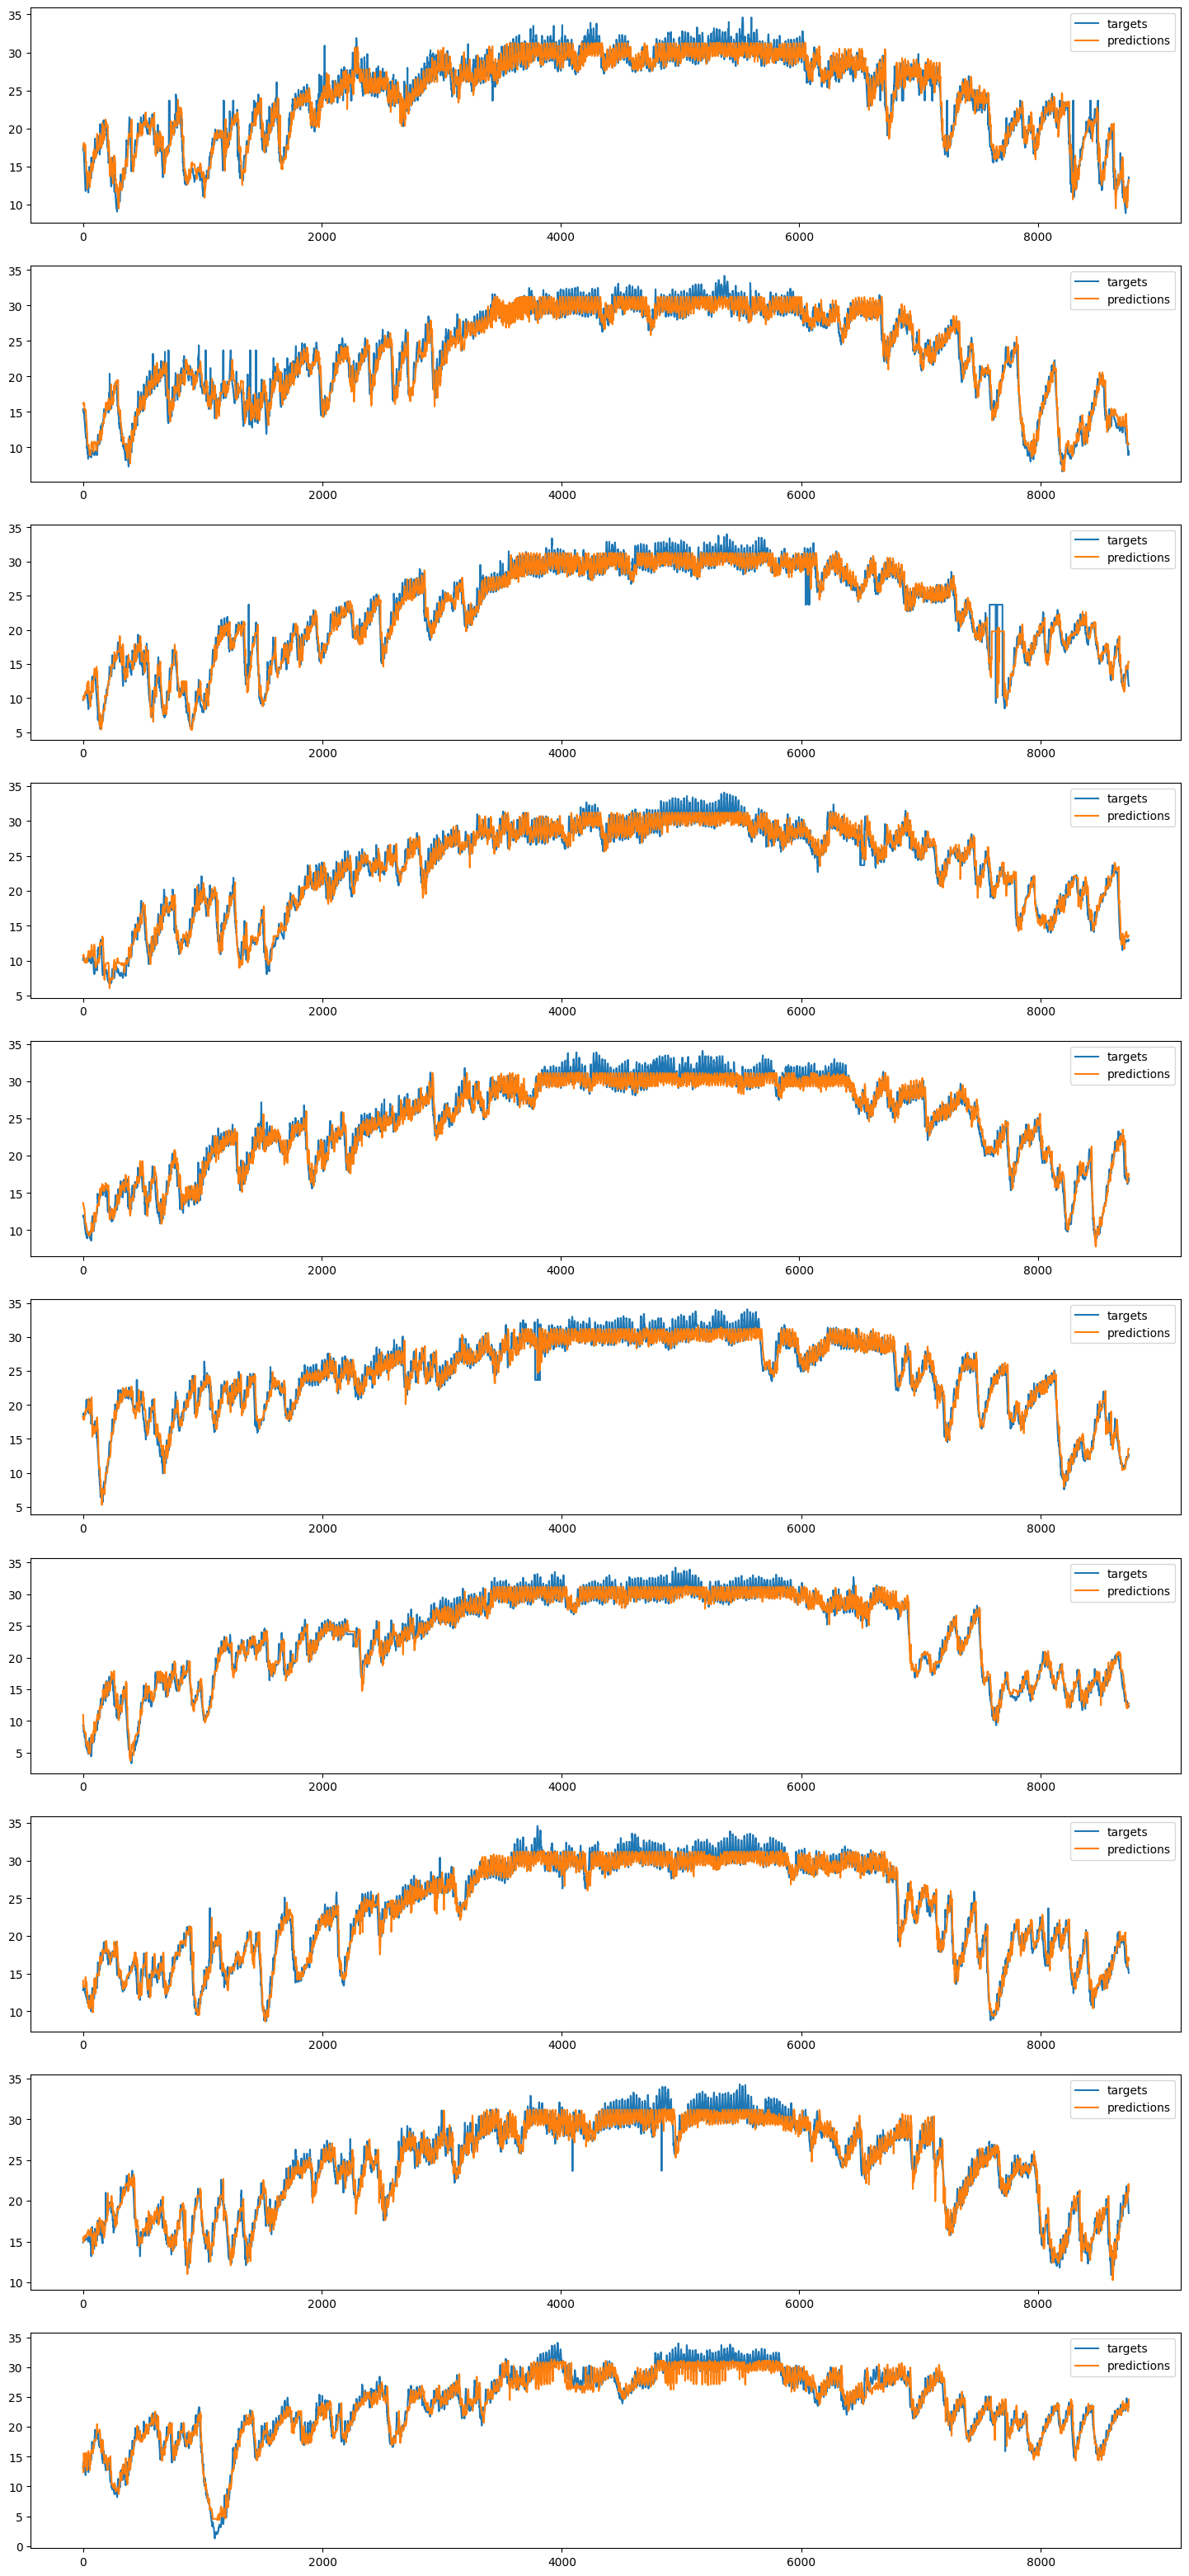

In [ ]:
fig, axs = plt.subplots(n_partitions, figsize=(18, 4 * n_partitions))

for i in range(n_partitions):
  valid_years = partitions[i][1]
  df_valid = df[df.index.year.isin(valid_years)]
  x_valid, y_valid, _ = split_preds_targets(df_valid, lead_time_hours, prev_pred_hours=prev_pred_hours)

  y_ = models[i].predict(x_valid).flatten()

  axs[i].plot(y_valid, label="targets")
  axs[i].plot(y_, label="predictions")
  axs[i].legend()

**Quantitive Evaluation**

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

metrics = {
    "mean_squared_error"  : mean_squared_error,
    "mean_absolute_error" : mean_absolute_error,
    "r2_score"            : r2_score,
}

keys = metrics.keys()
n_metrics = len(keys)

In [ ]:
results = np.zeros((n_partitions, n_metrics))

for i in range(n_partitions):
  valid_years = partitions[i][1]
  df_valid = df[df.index.year.isin(valid_years)]
  x_valid, y_valid, _ = split_preds_targets(df_valid, lead_time_hours, prev_pred_hours=prev_pred_hours)

  y_ = models[i].predict(x_valid).flatten()

  for j, key in enumerate(keys):
    results[i, j] = metrics[key](y_valid, y_)

  #results[i, :] = model.evaluate(x_valid, y_valid, verbose=0)

dfMetrics = pd.DataFrame(results, columns=keys)
dfMetrics

,mean_squared_error,mean_absolute_error,r2_score
0,2.288050,1.158675,0.925203
1,2.198838,1.145144,0.947999
2,2.394280,1.126749,0.946573
3,1.892894,1.065414,0.954452
4,1.571642,0.969056,0.956691
5,1.889658,1.044166,0.939153
6,1.571979,0.989266,0.965750
7,1.515762,0.922107,0.964232
8,1.662326,0.997379,0.946263
9,2.185381,1.162915,0.936130


### Evaluate Test Results

In [ ]:
# Get test data
df_test = df[df.index.year.isin([test_years])]
x_test, y_test, feature_names = split_preds_targets(df_test, lead_time_hours, prev_pred_hours=prev_pred_hours)

In [ ]:
# Get best model
best_idx = np.argmax(dfMetrics["r2_score"].values)
best_model = models[best_idx]

# Get predictions
preds_test = best_model.predict(x_test).flatten()

Text(0.5, 1.0, 'Test data evaluation')

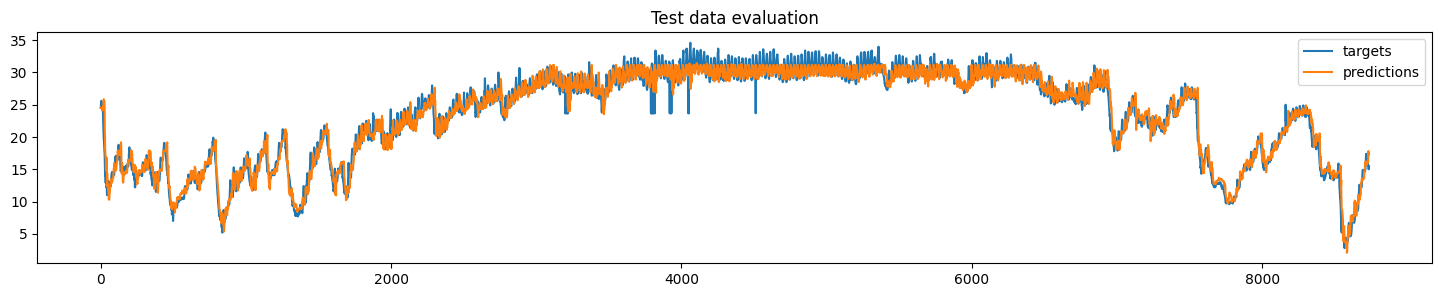

In [ ]:
fig, ax = plt.subplots(figsize=(18, 3))
ax.plot(y_test, label="targets")
ax.plot(preds_test, label="predictions")
ax.legend()
ax.set_title("Test data evaluation")

In [ ]:
for j, key in enumerate(keys):
  print("{}:  {}".format(key, metrics[key](y_test, preds_test)))

mean_squared_error:  1.9322528487168928
mean_absolute_error:  1.04723160000188
r2_score:  0.9620182338207137


Text(0.5, 1.0, 'Errors (targets - predictions)')

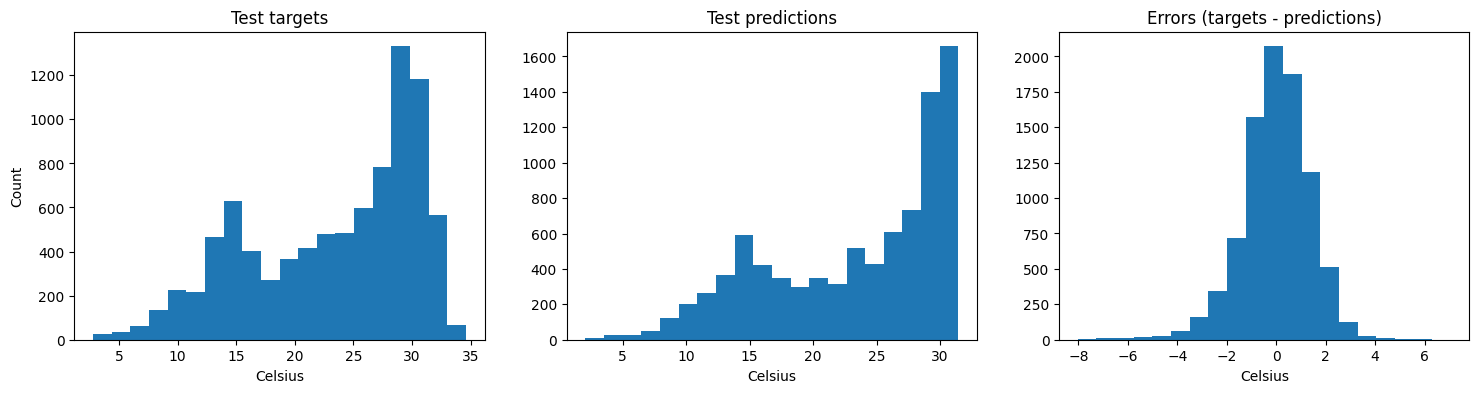

In [ ]:
y_error = y_test - preds_test

fig, axs = plt.subplots(1, 3, figsize=(18, 4))

axs[0].hist(y_test, bins=20)
axs[0].set_ylabel("Count")
axs[0].set_title("Test targets")
axs[0].set_xlabel("Celsius")

axs[1].hist(preds_test, bins=20)
axs[1].set_title("Test predictions")
axs[1].set_xlabel("Celsius")

axs[2].hist(y_error, bins=20);
axs[2].set_xlabel("Celsius")
axs[2].set_title("Errors (targets - predictions)")